In [1]:
##############################################
import sys,os
import numpy as np
import pylab as py
##############################################
import pylab as py
from  matplotlib import rc
import matplotlib.pyplot as plt
%matplotlib inline  
%config InlineBackend.figure_format = 'retina' 
##############################################
PATH='../python/'  # path of the JAMLIB python folder
sys.path.append(PATH)  
from corelib import JAMLIB
##############################################
import lhapdf
##############################################

## Using JAMLIB interface

In [7]:
jamPPDF=JAMLIB(PATH+'JAM15/PPDF')
jamT3PPDF=JAMLIB(PATH+'JAM15/T3PPDF')
#JAMffpi=JAMLIB(PATH+'JAM16/FFpion')
#JAMffk=JAMLIB(PATH+'JAM16/FFkaon')

########################################################## 
                                                           
     _   _    __  __ _     ___ ____                        
    | | / \  |  \/  | |   |_ _| __ )                       
 _  | |/ _ \ | |\/| | |    | ||  _ \                       
| |_| / ___ \| |  | | |___ | || |_) |                      
 \___/_/   \_\_|  |_|_____|___|____/                       
                                                           
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 
                                                           
Authors:                                                   
Nobuo Sato         (Jefferson Lab)                         
Jake Ethier        (College of William and Mary)           
Wally Melnitchouk  (Jefferson Lab)                         
Alberto Accardi    (Hampton University and Jefferson Lab)  
########################################################## 
loading JAM15/PPDF tables [100%]
#######

In [8]:
print jamPPDF.flavors()
print jamT3PPDF.flavors()

['g', 'sp', 'up', 'bp', 'cp', 'dp']
['u', 'd']


In [23]:
print jamPPDF.get_XF(0,'dp',0.2,10.)
print jamPPDF.get_XF(0,'sp',0.2,10.)

-0.112289338652
-0.0253861282302


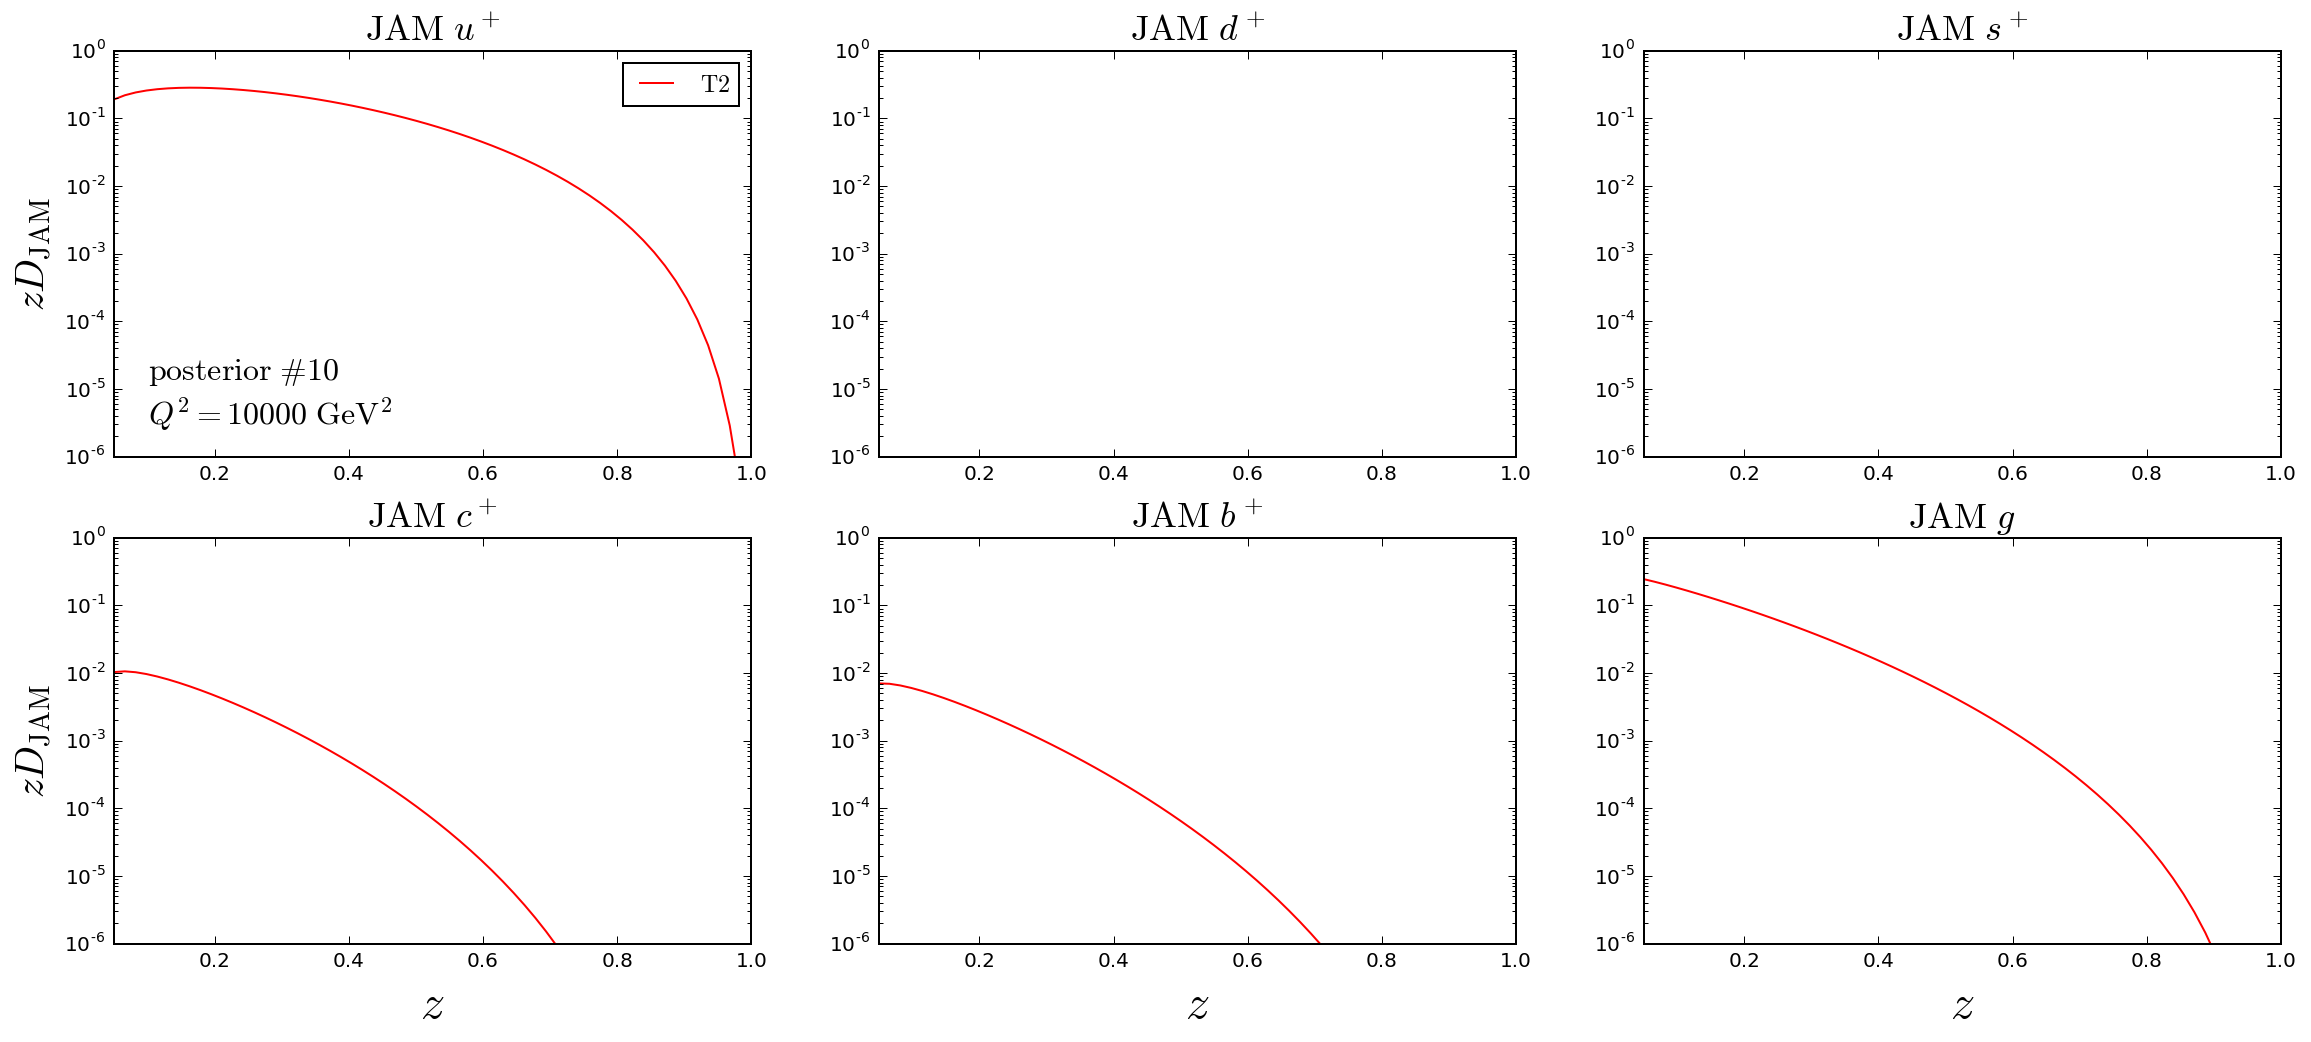

In [22]:
# Twist-2 PDFs

post = 10
Q2 = 10000. #JAMffpi.mZ2 #1.17210230e+02
z = np.linspace(0.05,1,60)

zT2_JAM = {}
for f in jamPPDF.flavors():
  zT2_JAM[f] = [jamPPDF.get_XF(post,f,z[i],Q2) for i in range(len(z))]

#zT3_JAM = {}
#for f in jamT3PPDF.flavors():
#  zT3_JAM[f] = [JAMffk.get_XF(post,f,z[i],Q2) for i in range(len(z))]

nrow,ncol,zoom=2,3,4
fig = plt.figure(figsize=(zoom*ncol*1.618,zoom*nrow))

plotlims = [0.05,1,1e-6,1.0]
plotscale = 'log'

flavors = ['up','dp','sp','cp','bp','g']

cnt=0
for f in flavors:  
  cnt+=1
  plt.subplot(2,3,cnt)
  plt.plot(z,zT2_JAM[f],'r-',label=r'$\rm T2$')
  #plt.plot(z,zk_JAM[cnt-1],'b-',label='$K$')
  plt.axis(plotlims)
  plt.yscale(plotscale)
  plt.title(r'${\rm JAM\ } %s$'%f.replace('p','^+'),size=18*zoom/4)
  if f in ['cp','bp','g']: 
    plt.xlabel('$z$', fontsize=24) #Label x axis
  if f in ['up','cp']: 
    plt.ylabel('$zD_{\\rm JAM}$',fontsize=20*zoom/4) # Label y axis
  if f in ['up']: 
    if plotscale=='linear':
      xQ,yQ = 0.4,0.79
      yQp = 1.13*yQ
    elif plotscale=='log':
      xQ,yQ = 0.1,3e-6
      yQp = np.exp(0.88*np.log(yQ))
    plt.text(xQ,yQp,r'${\rm posterior\ \#%d}$'%post,fontsize=16*zoom/4)
    plt.text(xQ,yQ,r'$Q^2=%0.0f {\rm\ GeV}^2$'%Q2 ,fontsize=16*zoom/4)
    plt.legend()

#plt.savefig('fig.JAM.%0.0f.png'%Q2)
plt.show()

# OLD CODE FROM HERE TO THE END, NEED WORK.

## Using LHAPDF interface

In [ ]:
#Plot of JAM z*D(z,Q2) vs z 

member = post+1 # same posterior as JAM (member=0 is the average)
Q2lha=Q2 # (Uses same Q2 as JAM)
z = np.linspace(0.05,1,60)

lhapdfffpi = lhapdf.mkPDF("JAM16FF_pi_Ceven",member)
lhapdfffk = lhapdf.mkPDF("JAM16FF_K_Ceven",member)

zpi_lha = []
zk_lha = []
for f in [2,1,3,4,5,21]:
  zpi_lha.append([lhapdfffpi.xfxQ2(f,z[i],Q2lha) for i in range(len(z))])
  zk_lha.append([lhapdfffk.xfxQ2(f,z[i],Q2lha) for i in range(len(z))])
  

nrow,ncol,zoom=2,3,4
fig = plt.figure(figsize=(zoom*ncol*1.618,zoom*nrow))

plotlims = [0.05,1,1e-10,1.0]
plotscale = 'log'

flavors = ['up','dp','sp','cp','bp','g']

cnt=0
for f in flavors:  
  cnt+=1
  plt.subplot(2,3,cnt)
  plt.plot(z,zpi_lha[cnt-1],'r-',label='$\pi$')
  plt.plot(z,zk_lha[cnt-1],'b-',label='$K$')
  plt.axis(plotlims)
  plt.yscale(plotscale)
  plt.title(r'${\rm LHAPDF\ } %s$'%f.replace('p','^+'),size=18*zoom/4)
  if f in ['cp','bp','g']: 
    plt.xlabel('$z$', fontsize=24) #Label x axis
  if f in ['up','cp']: 
    plt.ylabel('$zD_{\\rm LHAPDF}$',fontsize=20*zoom/4) # Label y axis
  if f in ['up']: 
    if plotscale=='linear':
      xQ,yQ = 0.4,0.79
      yQp = 1.13*yQ
    elif plotscale=='log':
      xQ,yQ = 0.1,3*plotlims[2]
      yQp = np.exp(0.88*np.log(yQ))
    plt.text(xQ,yQp,r'${\rm member\ \#%d}$'%member,fontsize=16*zoom/4)
    plt.text(xQ,yQ,r'$Q^2=%0.0f {\rm\ GeV}^2$'%Q2 ,fontsize=16*zoom/4)
    plt.legend()

#plt.savefig('fig.LHAPDF.%0.0f.png'%Q2)
plt.show()

## Ratios of LHAPDF / JAM interpolators

In [ ]:
#Ratios JAM/lhapdf for u,d,s

rpi = []
rk = []
for f in [0,1,2,3,4,5]:
  rpi.append([zpi_JAM[f][i]/zpi_lha[f][i] for i in range(len(z))])
  rk.append([zk_JAM[f][i]/zk_lha[f][i] for i in range(len(z))])

nrow,ncol,zoom=2,3,4
fig = plt.figure(figsize=(zoom*ncol*1.618,zoom*nrow))
plotlims=[0.05,1,0.99,1.01]

flavors = ['up','dp','sp','cp','bp','g']

cnt=0
for f in flavors:  
  cnt+=1
  plt.subplot(2,3,cnt)
  plt.plot(z,rpi[cnt-1],'r-',label='$\pi$')
  plt.plot(z,rk[cnt-1],'b-',label='$K$')
  plt.title(r'${\rm JAM/LHAPDF\ } %s$'%f.replace('p','^+'),size=18*zoom/4)
  plt.axis(plotlims)
  if f in ['cp','bp','g']: 
    plt.xlabel('$z$', fontsize=30) #Label x axis
  if f in ['up','cp']: 
    plt.ylabel('$D_{\\rm LHAPDF}/D_{\\rm JAM}$',fontsize=18*zoom/4) # Label y axis
  if f in ['up']:
    rel=0.15*zoom/4
    plt.text(0.1,(1-rel)*plotlims[2]+rel*plotlims[3],r'${\rm posterior\ \#%d}$'%post,fontsize=16*zoom/4)
    rel=0.05
    plt.text(0.1,(1-rel)*plotlims[2]+rel*plotlims[3],r'$Q^2=%0.0f {\rm\ GeV}^2$'%Q2 ,fontsize=16)
    plt.legend()

#plt.savefig('fig.LHA_JAM.%0.0f.png'%Q2)
plt.show()

In [ ]:
print JAMffpi.get_Q2grid()

In [ ]:
print JAMffpi.get_Xgrid()